# 1. Importing libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('feature_engineered_data_for_eda.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,male,Asymptomatic,152,239,no,Normal,158,yes,3.6,Flat,2,Revserible defect,Presence
1,52,male,Typical Angina,125,325,no,Left ventricular hypertrophy,171,no,0.0,Upslpoing,0,Normal,Absence
2,56,female,Atypcial Angina,160,188,no,Left ventricular hypertrophy,151,no,0.0,Upslpoing,0,Normal,Absence
3,44,female,Non-anginal pain,134,229,no,Left ventricular hypertrophy,150,no,1.0,Flat,0,Normal,Absence
4,58,male,Asymptomatic,140,234,no,Left ventricular hypertrophy,125,yes,3.8,Flat,3,Normal,Presence


# 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

### Filtering numerical & categorical columns for Uni-variate Analysis

In [35]:
numerical_cols = df.select_dtypes(include=['int64','float'])
categorical_cols = df.select_dtypes(exclude=['int64','float'])

print("dataframe of numerical columns: ",numerical_cols)
print("dataframe of categorical columns: ",categorical_cols)

dataframe of numerical columns:          Age   BP  Cholesterol  Max HR  ST depression  Number of vessels fluro
0        58  152          239     158            3.6                        2
1        52  125          325     171            0.0                        0
2        56  160          188     151            0.0                        0
3        44  134          229     150            1.0                        0
4        58  140          234     125            3.8                        3
...     ...  ...          ...     ...            ...                      ...
629995   56  110          226     132            0.0                        0
629996   54  128          249     150            0.0                        0
629997   67  130          275     149            0.0                        2
629998   52  140          199     157            0.0                        0
629999   51  130          199     168            0.0                        0

[630000 rows x 6 columns]
data

In [36]:
categorical_cols

,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,Slope of ST,Thallium,Heart Disease
0,male,Asymptomatic,no,Normal,yes,Flat,Revserible defect,Presence
1,male,Typical Angina,no,Left ventricular hypertrophy,no,Upslpoing,Normal,Absence
2,female,Atypcial Angina,no,Left ventricular hypertrophy,no,Upslpoing,Normal,Absence
3,female,Non-anginal pain,no,Left ventricular hypertrophy,no,Flat,Normal,Absence
4,male,Asymptomatic,no,Left ventricular hypertrophy,yes,Flat,Normal,Presence
...,...,...,...,...,...,...,...,...
629995,female,Typical Angina,no,Normal,no,Upslpoing,Revserible defect,Absence
629996,male,Asymptomatic,yes,Left ventricular hypertrophy,no,Flat,Normal,Absence
629997,male,Asymptomatic,no,Normal,no,Upslpoing,Revserible defect,Presence
629998,male,Asymptomatic,no,Left ventricular hypertrophy,no,Upslpoing,Fiexed defect,Presence


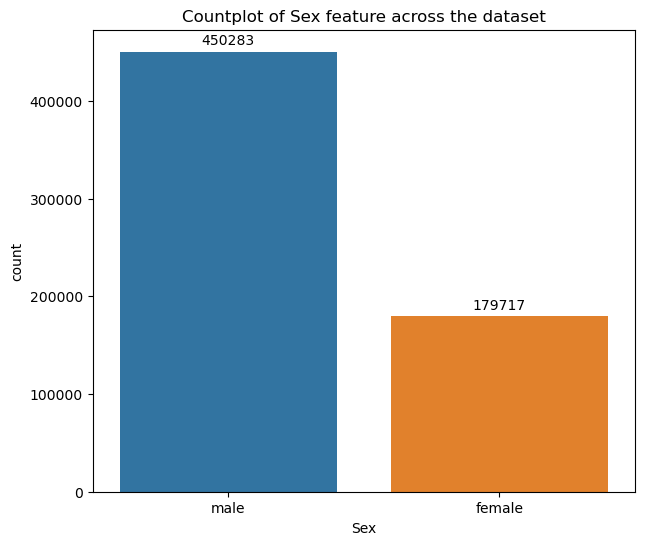

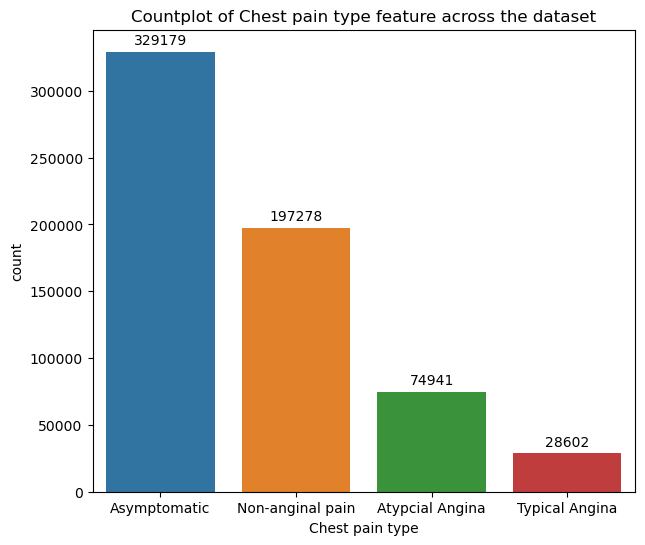

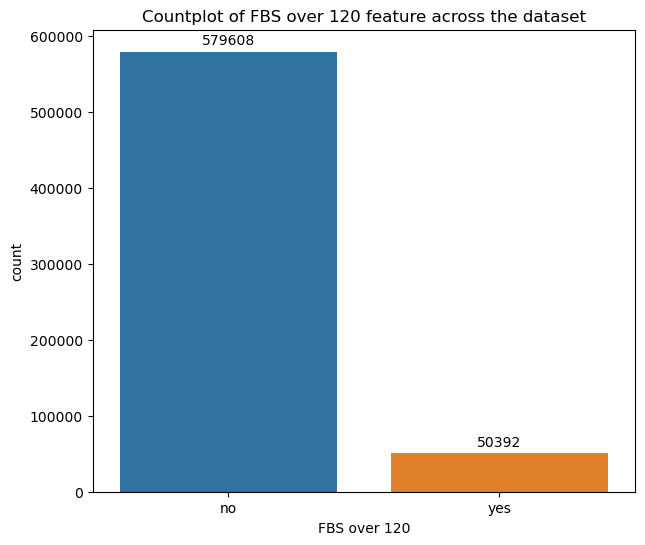

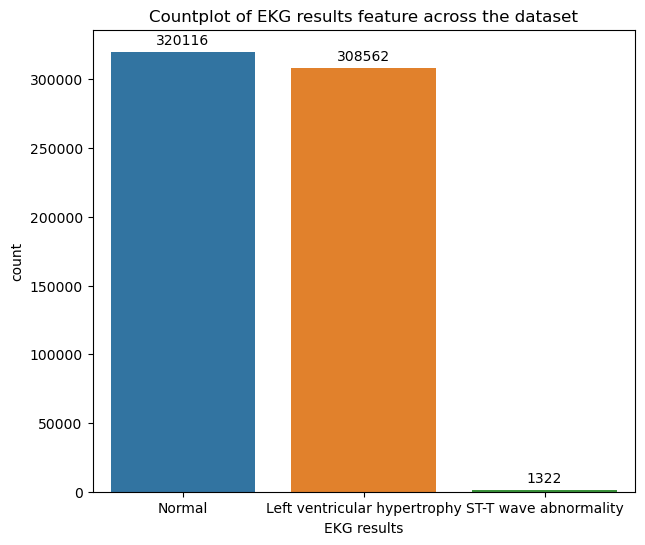

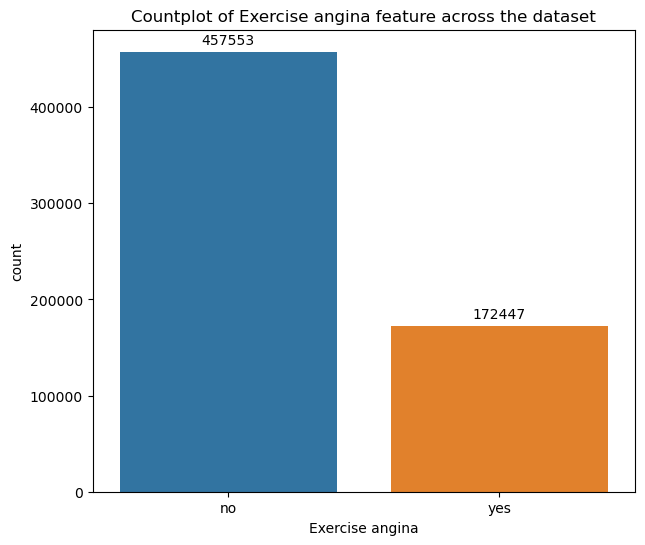

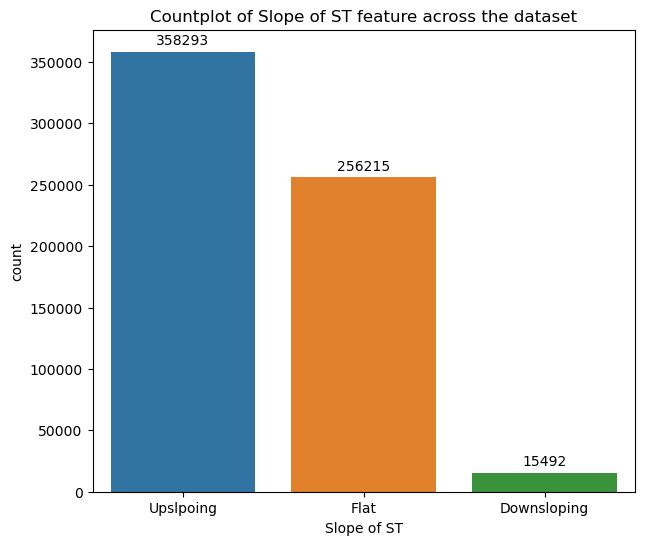

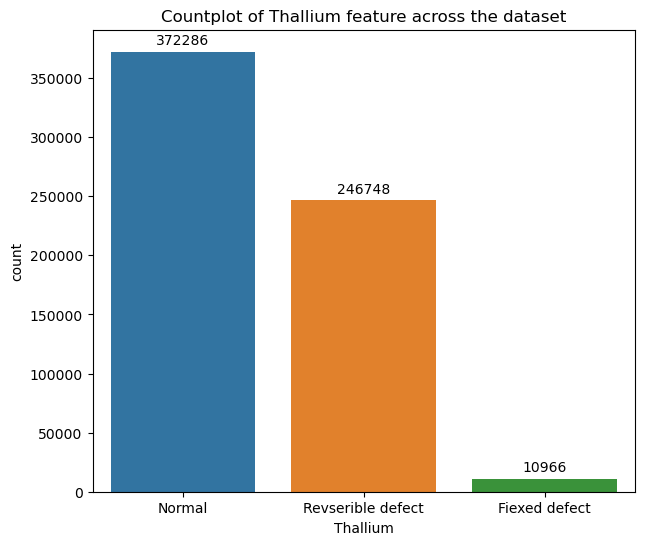

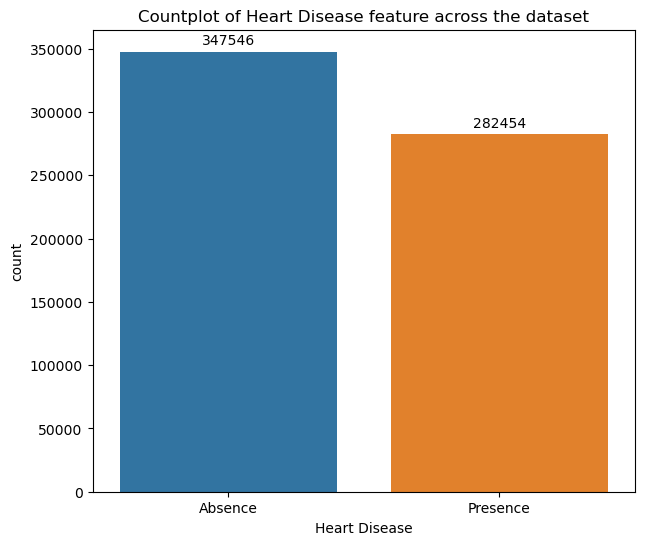

In [37]:
cat_cols = categorical_cols.columns.to_list()
for i in cat_cols:
    plt.figure(figsize=(7,6))
    order=categorical_cols[i].value_counts().index
    ax=sb.countplot(x=categorical_cols[i],order=order)
    
    for container in ax.containers:
        ax.bar_label(container,fmt="%1.f",label_type='edge',padding=3)

    plt.title(f"Countplot of {i} feature across the dataset")
    plt.show()

In [38]:
numerical_cols

,Age,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro
0,58,152,239,158,3.6,2
1,52,125,325,171,0.0,0
2,56,160,188,151,0.0,0
3,44,134,229,150,1.0,0
4,58,140,234,125,3.8,3
...,...,...,...,...,...,...
629995,56,110,226,132,0.0,0
629996,54,128,249,150,0.0,0
629997,67,130,275,149,0.0,2
629998,52,140,199,157,0.0,0


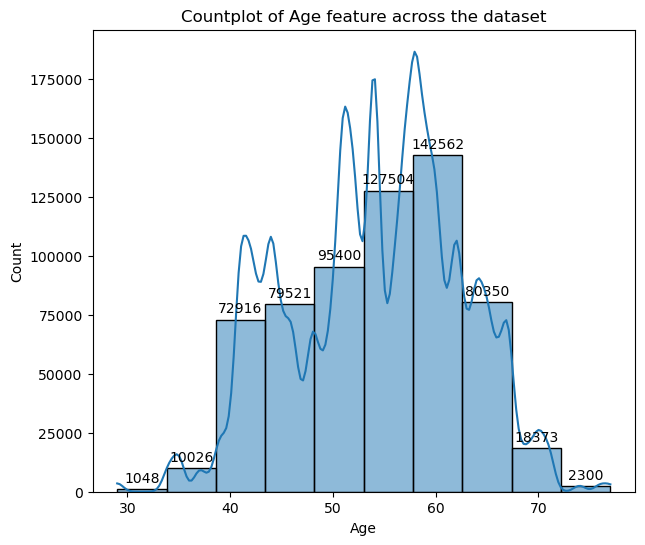

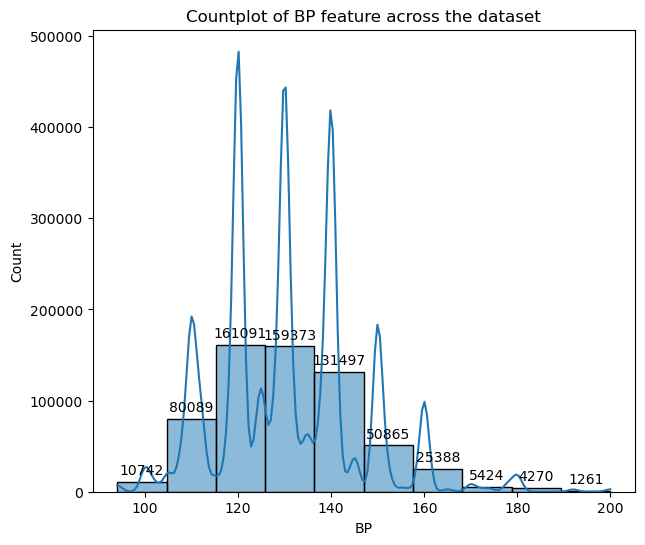

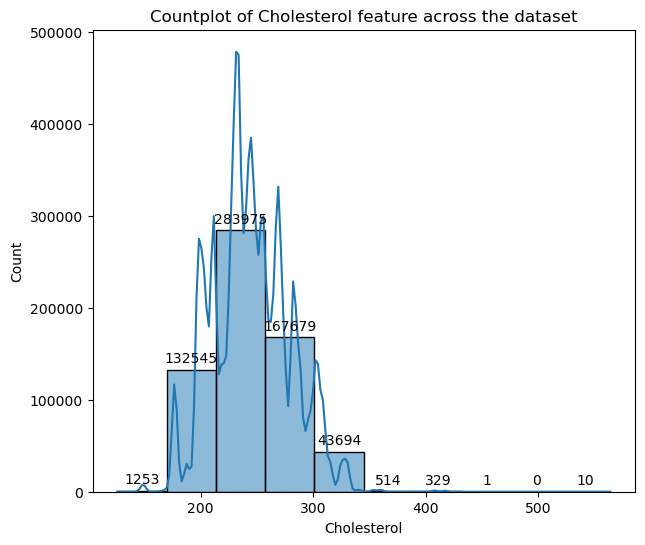

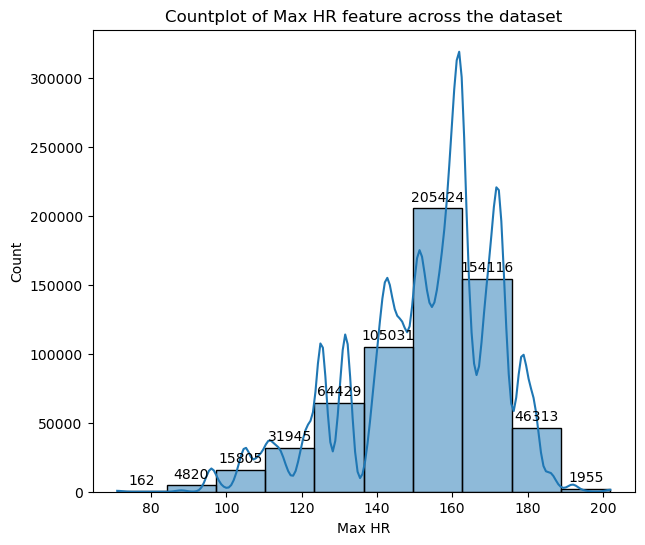

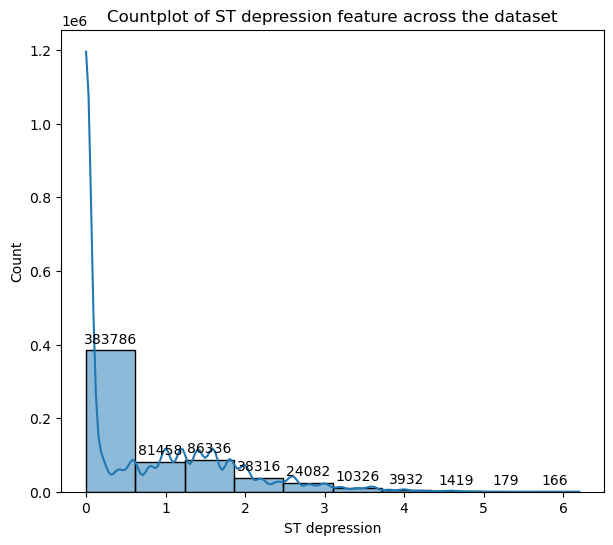

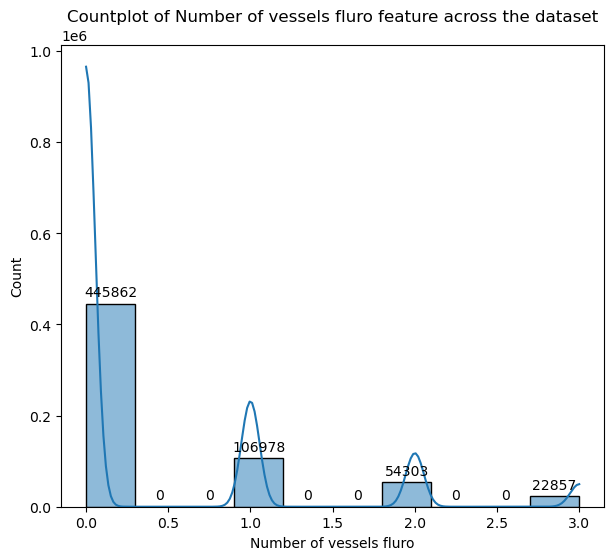

In [40]:
num_cols = numerical_cols.columns.to_list()
for i in num_cols:
    plt.figure(figsize=(7,6))
    ax=sb.histplot(x=numerical_cols[i],bins=10,kde=True)
    
    for container in ax.containers:
        ax.bar_label(container,fmt="%1.f",label_type='edge',padding=3)

    plt.title(f"Countplot of {i} feature across the dataset")
    plt.show()

### 2.2 Bivariate Analysis

**Categorical Columns**

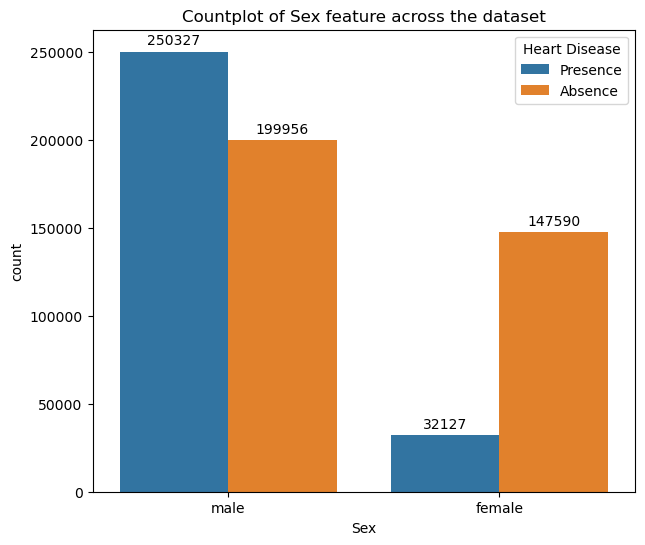

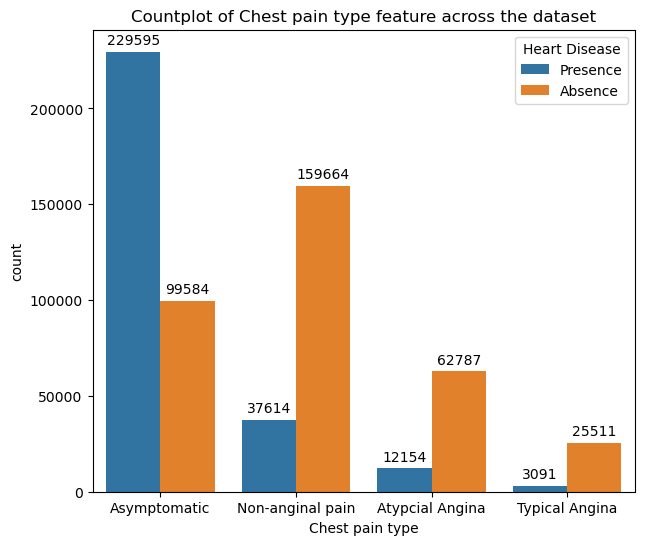

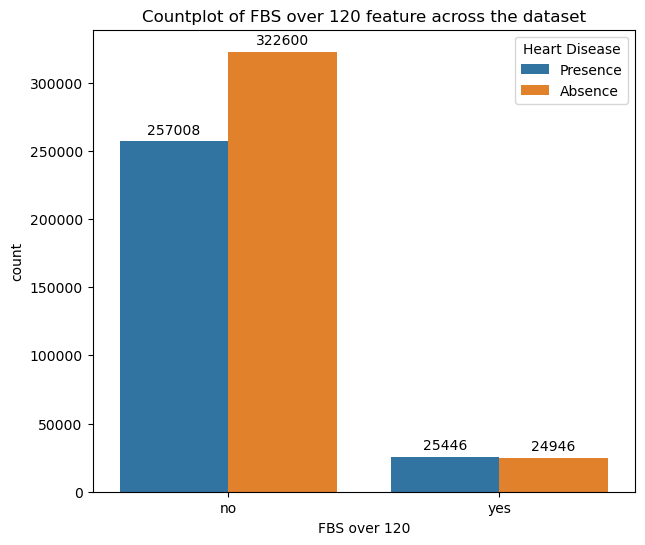

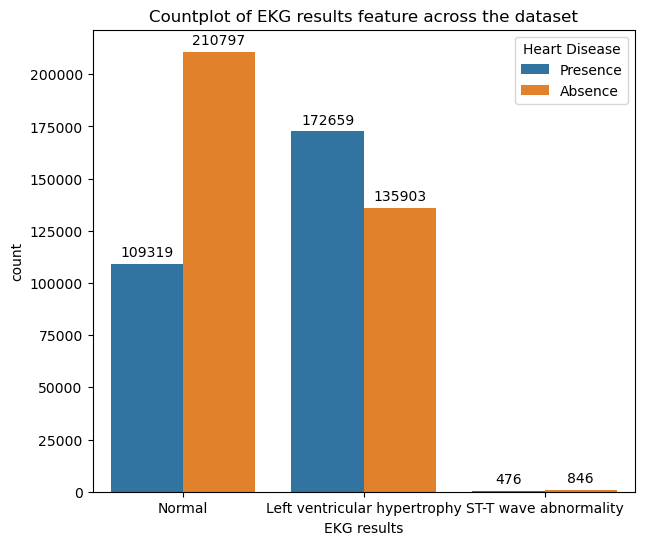

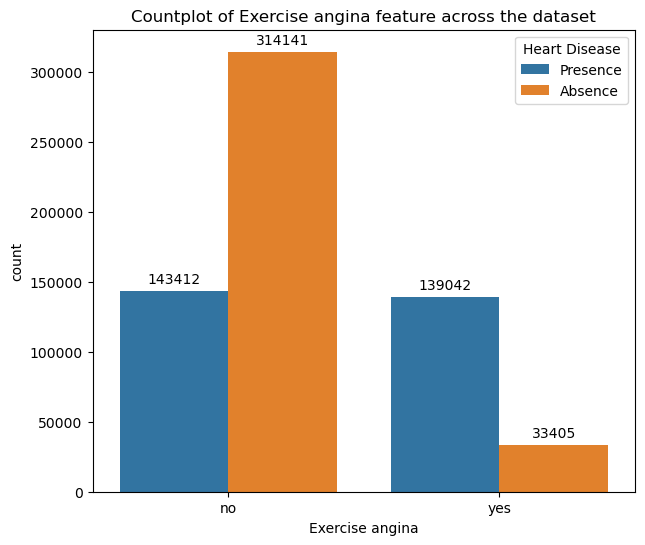

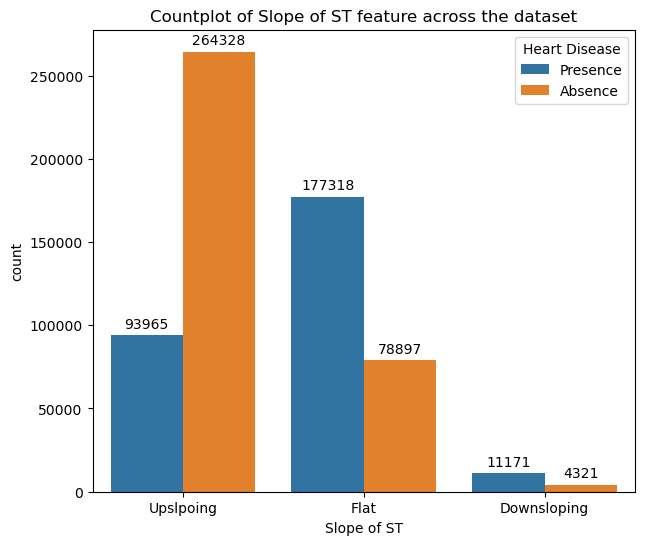

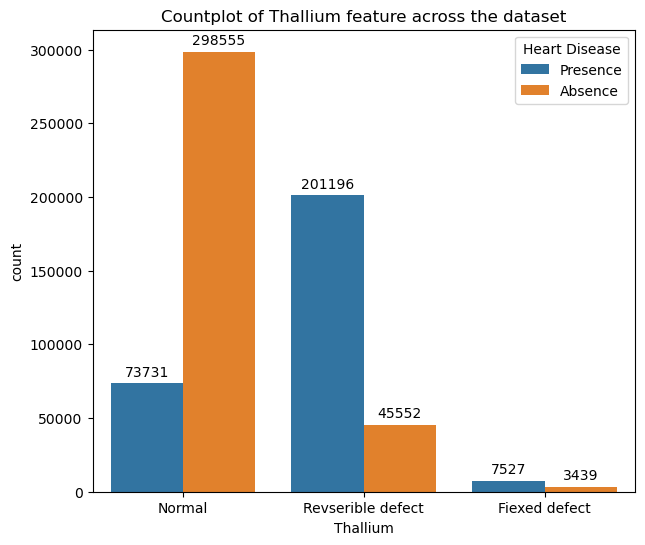

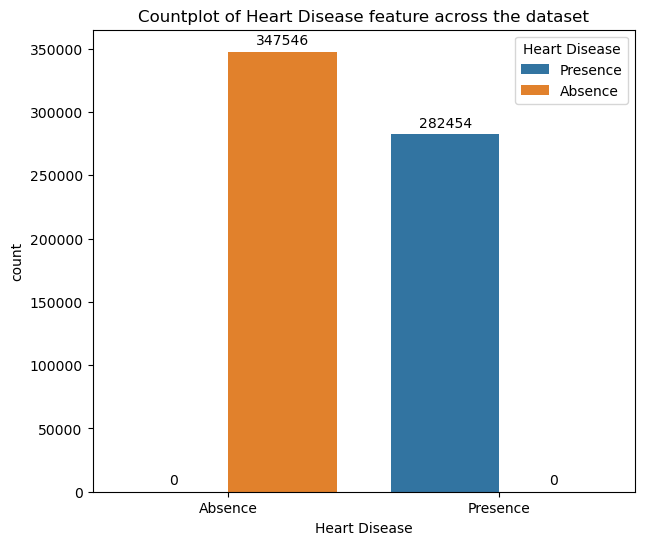

In [ ]:
cat_cols = categorical_cols.columns.to_list()
for i in cat_cols:
    plt.figure(figsize=(7,6))
    order=categorical_cols[i].value_counts().sort_values(ascending=False).index
    ax=sb.countplot(x=categorical_cols[i],hue=categorical_cols['Heart Disease'],order=order)
    
    for container in ax.containers:
        ax.bar_label(container,fmt="%1.f",label_type='edge',padding=3)

    plt.title(f"Distribution of {i} & across the dataset")
    plt.show()

**Numerical Columns**

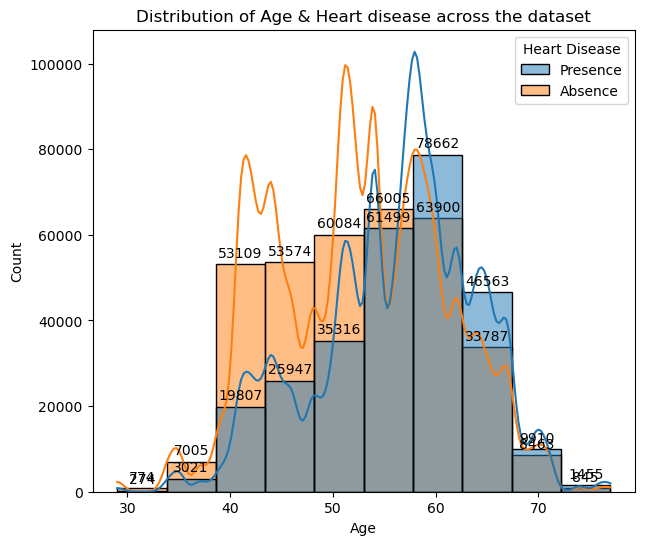

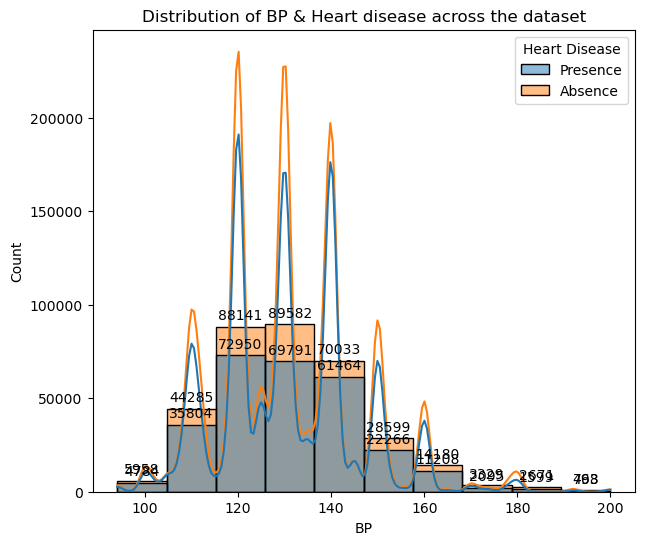

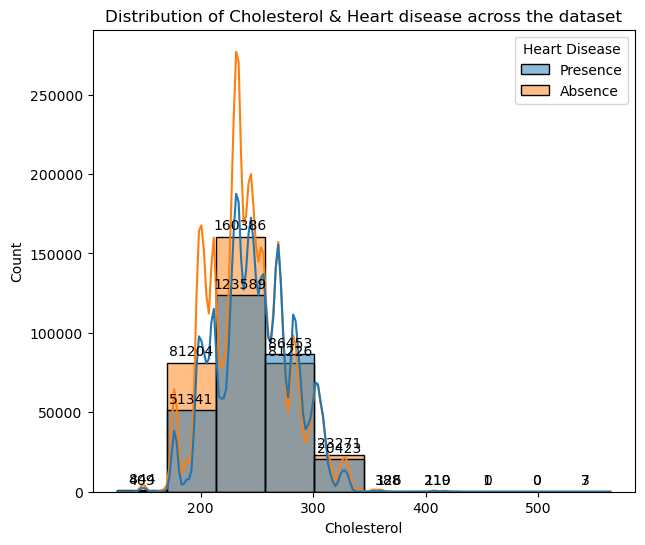

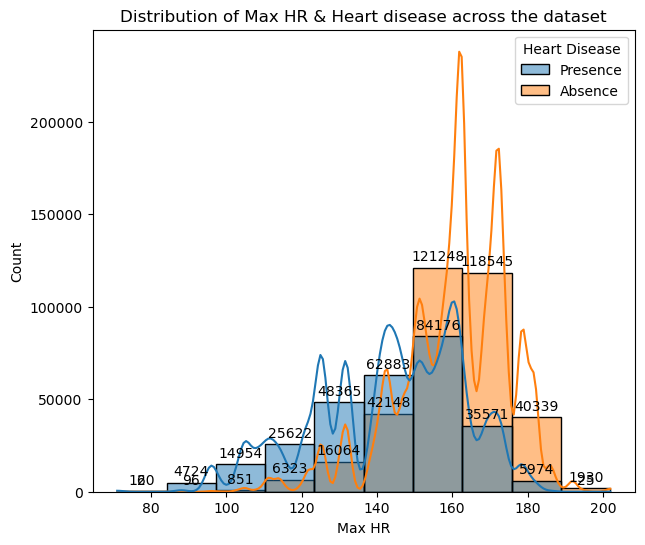

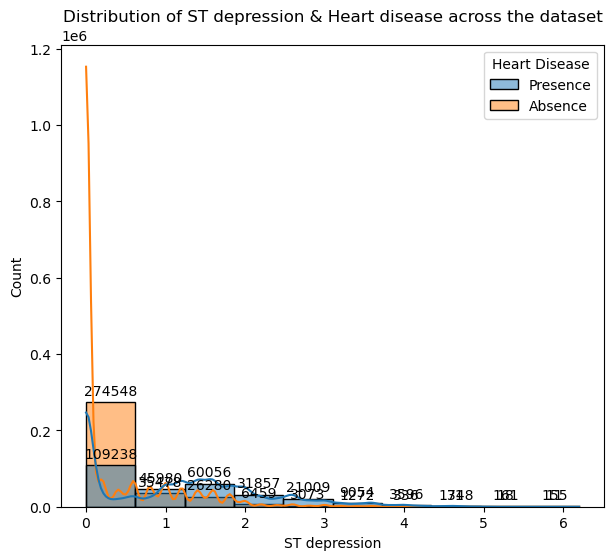

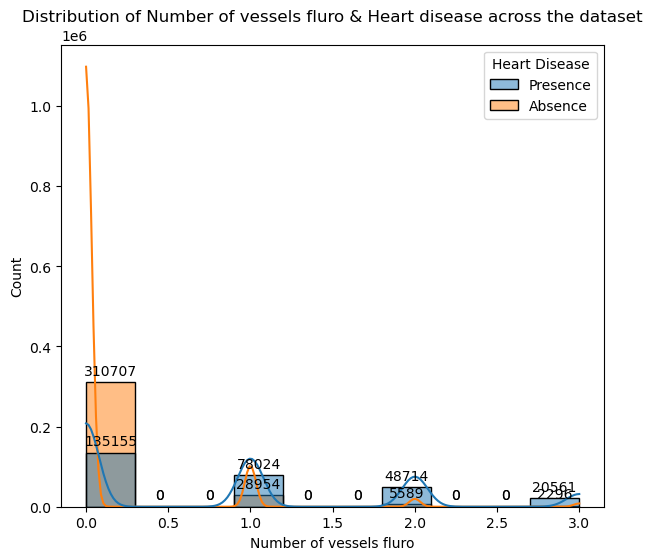

In [48]:
num_cols = numerical_cols.columns.to_list()
for i in num_cols:
    plt.figure(figsize=(7,6))
    ax=sb.histplot(x=numerical_cols[i],hue=df['Heart Disease'],bins=10,kde=True)
    
    for container in ax.containers:
        ax.bar_label(container,fmt="%1.f",label_type='edge',padding=3)

    plt.title(f"Distribution of {i} & Heart disease across the dataset")
    plt.show()